In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# hyper parameters
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [5]:
# training data
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

In [6]:
# define model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20, 1)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [24]:
# different nets
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()
loss_hists = [[], [], [], []]  # record loss

In [25]:
for epoch in range(EPOCH):
    print(epoch)
    for step, (b_x, b_y) in enumerate(loader):
        b_x.requires_grad_(True)
        for net, opt, loss_hist in zip(nets, optimizers, loss_hists):
            output = net(b_x)
            loss = loss_func(output, b_y)
            opt.zero_grad()  # clear gradients for next train
            loss.backward()
            opt.step()
            loss_hist.append(loss.data.item())

0
1
2
3
4
5
6
7
8
9
10
11


(0, 0.2)

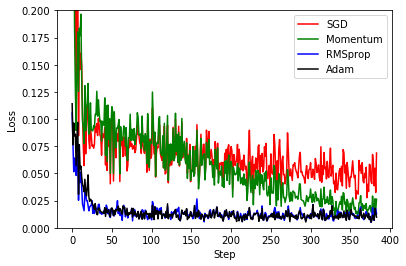

In [26]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
colors = ['r', 'g', 'b', 'k']
for i, loss_hist in enumerate(loss_hists):
    plt.plot(loss_hist, label=labels[i], color=colors[i])
plt.legend(loc='best')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.ylim((0, 0.2))